In [51]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [52]:
#Import relevant CSV files to the dataset

data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
data_budget = pd.read_csv('zippedData/Mojo_budget_update.csv')

In [53]:
## Merged imdb.title.basics.csv.gz and imdb.title.ratings.csv.gz on the column 'tconst' with an inner join to eliminate 
## non-matching items.
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [54]:
## Renamed 'primary_title' to 'title' in order to smoothly merge this dataframe with bom.movie_gross.csv.gz.
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [55]:
## Merged IMDB and BOM data into one dataframe
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [56]:
#Created a list of columns for the movie_titles dataframe
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'numvotes']]

In [57]:
#Dropped all null values and set as default
movie_titles.dropna(axis=0, how='any', inplace=True)

In [58]:
#Converted the column type for 'Foreign Gross' from object to float
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [59]:
#Created a column for total_gross revenue
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [60]:
#Adjusted the columns to eliminate domestic_gross and foreign_gross
movie_titles_genres = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year', 'numvotes']]
movie_titles_genres.head()

,title,studio,genres,total_gross,year,numvotes
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,2010,682218
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,2010,1841066
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,2010,167532
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,2010,211733
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,2010,657690


In [61]:
#Created a dataframe of just the top 30 movies of all-time based on total gross revenue

top_30_alltime = movie_titles_genres.sort_values(by='total_gross', ascending=False).head(30)
top_30_alltime.head()

,title,studio,genres,total_gross,year,numvotes
1618,Avengers: Age of Ultron,BV,"Action,Adventure,Sci-Fi",1405400000.0000,2015,665594
2752,Black Panther,BV,"Action,Adventure,Sci-Fi",1347000000.0000,2018,516148
2435,Star Wars: The Last Jedi,BV,"Action,Adventure,Fantasy",1332600000.0000,2017,462903
2753,Jurassic World: Fallen Kingdom,Uni.,"Action,Adventure,Sci-Fi",1309500000.0000,2018,219125
952,Frozen,BV,"Adventure,Drama,Sport",1276400000.0000,2013,62311


Text(0.5, 1.0, 'Top 30 Movies of All Time')

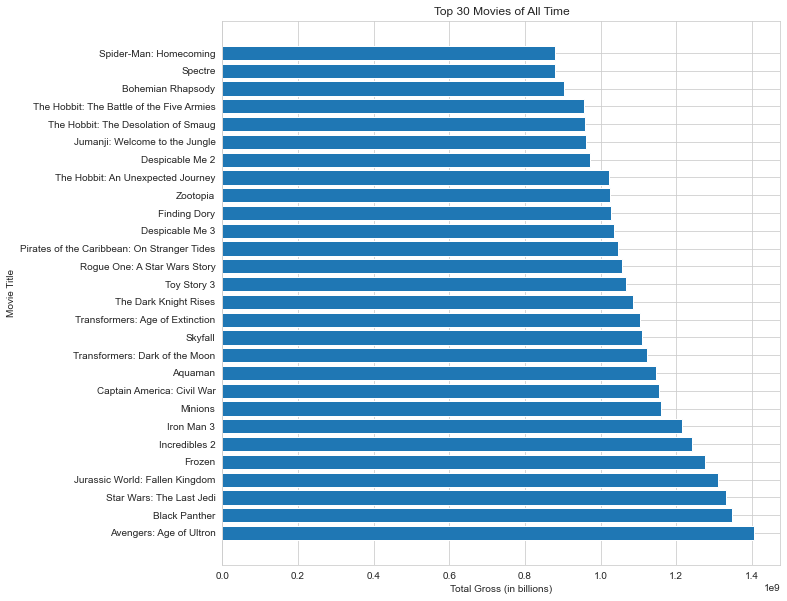

In [62]:
#Bar graph of the top 30 movies of all time

plt.figure(figsize=(10,10))
plt.barh(top_30_alltime['title'], top_30_alltime['total_gross'])
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies of All Time')

In [63]:
#Sorted the dataset and calculated the average gross revenue by year
data=movie_titles_genres.groupby('year')['total_gross'].mean()
data

year
2010    93354131.5467
2011    91649511.2172
2012   102862947.8837
2013   154303561.6054
2014   123818082.0194
2015   147134826.3697
2016   148168709.6667
2017   174275364.9885
2018   159626217.3094
Name: total_gross, dtype: float64

Text(0, 0.5, 'Average Gross Revenue (in billions)')

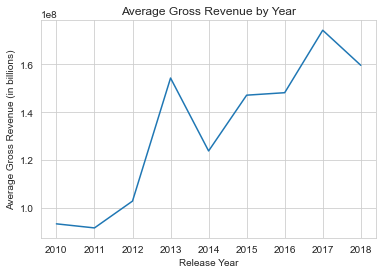

In [64]:
#Plotted a line graph to show this
data.plot()
plt.title('Average Gross Revenue by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Gross Revenue (in billions)')

In [65]:
#Created a Python function to iterate through all of the individual genres in the series, separating them when a comma appears.
#Then the function returns the count of the individual genres
def count_genre(x):
    data_plot = movie_titles_genres[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [66]:
#Create a new series from the function
total_genre_movies = count_genre('genres')

Text(0, 0.5, 'Genres')

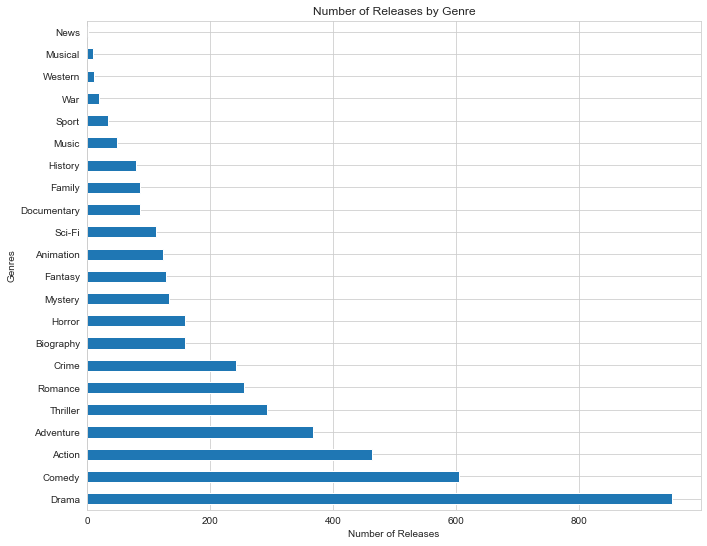

In [67]:
#Horizontal Bar Graph of the Number of Releases by Genre
total_genre_movies.plot(kind='barh', figsize=(11,9))
plt.title('Number of Releases by Genre')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')

In [68]:
##Creates an alphabetized list of genres that are separated

unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [69]:
## Changed variable name of list for clarity
genre_list = movie_genres
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [70]:
## Mapped a list that could be iterated through and created two arrays to set up a new dataframe
genre_details_pop = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
popularity = np.array(movie_titles_genres['numvotes'])

In [71]:
## Created a new dataframe full of NaN values, then wrote a for loop to interate through the dataframe and replace the null values with the sum of 'total_gross

popularity_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
popularity_df = popularity_df.fillna(value = 0.0)
z = 0
for i in genre_details_pop:
    split_genre = list(map(str, i.split(',')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [72]:
popularity_df.head()
popularity_df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000
mean,2710628.0000,2849841.2273,2813532.2727,2936295.3636,2668502.6818,2237621.0909,2095717.2273,1676458.9091,1169866.5000
std,2968265.0475,3163818.1672,3169671.9991,3397118.8064,3360209.3107,2755869.8394,2608116.4880,2021405.5099,1456623.2818
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,343431.7500,227365.2500,428624.5000,171162.0000,225199.2500,320504.0000,132609.0000,80343.5000,151280.7500
50%,1711372.0000,1308934.0000,1577142.0000,1782539.5000,1070121.5000,937500.5000,1554049.5000,1084154.5000,506350.0000
75%,3184754.5000,4695966.0000,3231851.7500,5266512.2500,4239762.7500,2972035.7500,2188260.0000,2278021.2500,1296271.2500
max,8894404.0000,9839946.0000,9683590.0000,10025440.0000,10422221.0000,8293481.0000,8532350.0000,6729552.0000,5103660.0000


In [73]:
#Calculated the standard score of popularity_df in order to see which genres were more popular than the standard deviation
#of popularity_df in order to see which genres were definitely more popular and which ones underperformed
def calculate_std(x):
    return (x - x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,2.1106,2.1790,2.2176,2.0308,2.3618,2.0581,2.5260,2.5586,2.7642
Adventure,1.9573,1.4135,1.6359,1.9625,1.9556,2.0708,2.2570,2.1347,2.3666
Animation,-0.0366,-0.4755,-0.3742,-0.3703,-0.4746,-0.4101,-0.1029,-0.4003,-0.5193
Biography,-0.2599,-0.6313,-0.5783,0.1334,-0.2200,-0.0161,-0.2141,-0.1777,0.0255
Comedy,1.4455,1.3851,1.5018,0.8728,0.7156,1.2976,1.2492,0.9933,0.7845


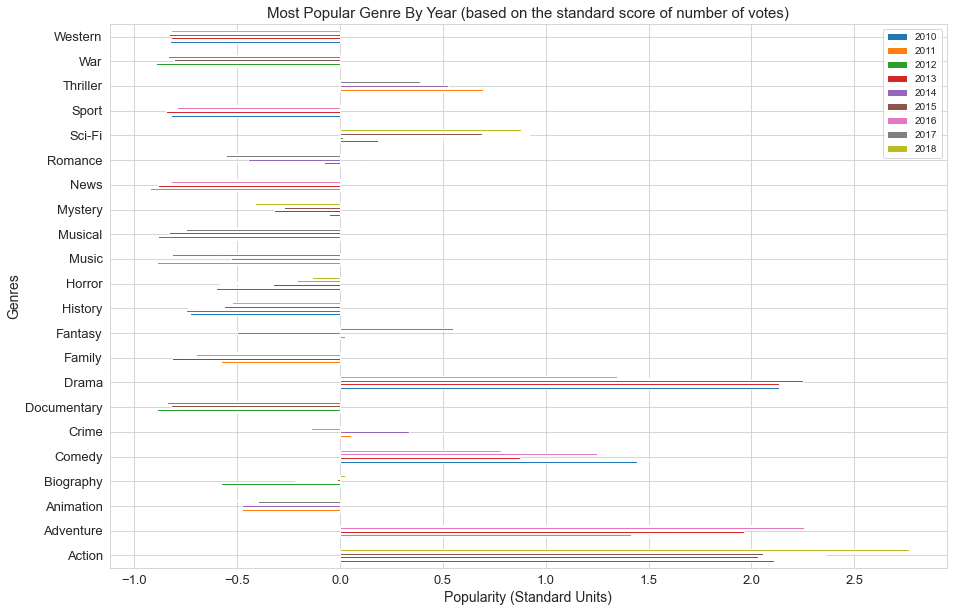

In [74]:
# Created a graph to show the standard score
popular_genre.plot(kind='barh',figsize = (15,10),fontsize=13)
plt.title("Most Popular Genre By Year (based on the standard score of number of votes)",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

<AxesSubplot:>

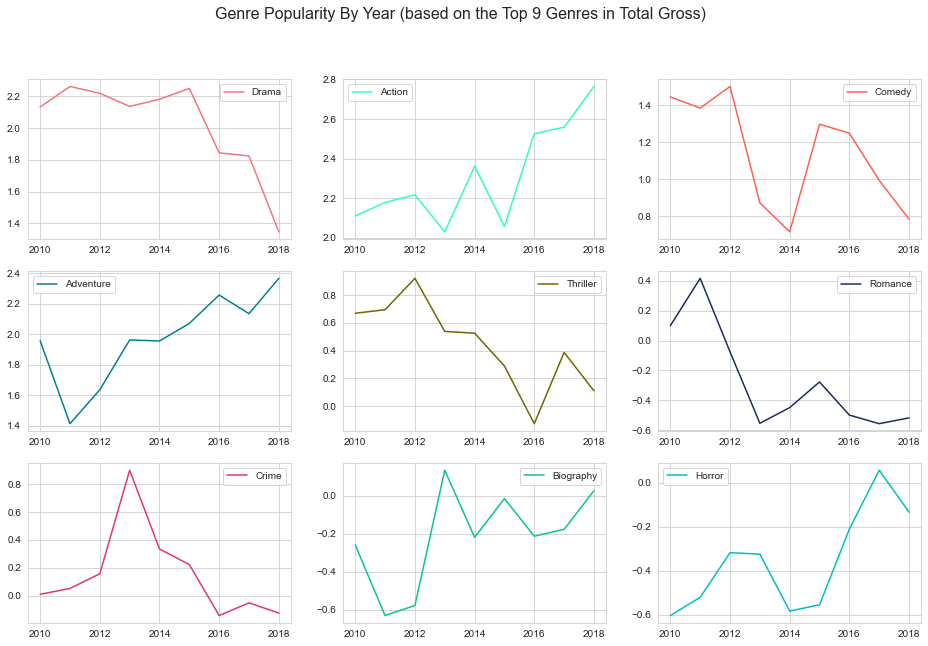

In [75]:
#Create Subplot to show Popularity of the Top 9 Grossing Genres
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity By Year (based on the Top 9 Genres in Total Gross)',fontsize = 16)

#Show all 9 Subplots
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

In [76]:
#Created new dataframe to show Total Gross Revenue by Year
genre_details_gross = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
gross = np.array(movie_titles_genres['total_gross'])

In [77]:
gross_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
gross_df = gross_df.fillna(value = 0.0)
z = 0
for i in genre_details_gross:
    split_genre = list(map(str, i.split(',')))
    gross_df.loc[split_genre, year[z]] = gross_df.loc[split_genre, year[z]] + gross[z]
    z+=1

<AxesSubplot:>

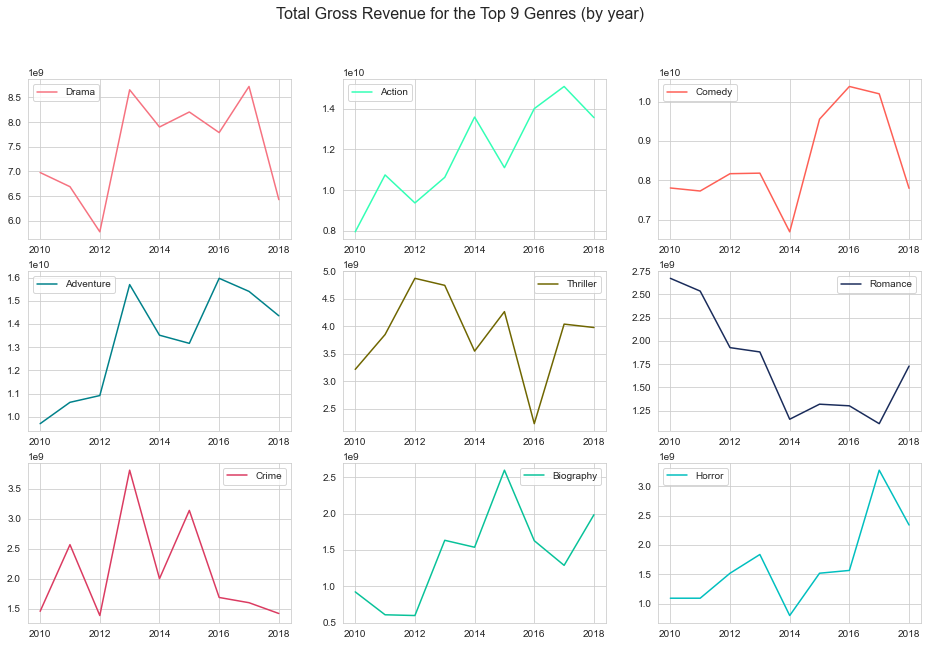

In [78]:
#Create Subplot to show Total Gross Revenue by year
sns.set_style("whitegrid")
fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Total Gross Revenue for the Top 9 Genres (by year)',fontsize = 16)

#Show all 9 Subplots
gross_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
gross_df.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)
gross_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
gross_df.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
gross_df.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
gross_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
gross_df.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
gross_df.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
gross_df.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

Data Cleaning (Part 2):
In this section, I created an entirely new dataframe using the provided Box Office Mojo movie gross dataset and a dataset 
that I found that showed the budgets for movies on Box Office Mojo.

The new dataset also contained the column 'tframe', which I was able to use to merge the dataframes.
The overall functions are the same, but I needed a clean dataframe with a different name to work from.

In [79]:
df = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [80]:
data_budget_overall = pd.merge(df, data_budget, on='tconst', how='inner')

In [81]:
data_budget_overall = data_budget_overall.rename(columns={'primary_title': 'title'})

In [82]:
movie_titles_budget = pd.merge(data_movie_gross, data_budget_overall, on='title', how='inner')
movie_titles_budget.head()

,title,studio,domestic_gross,foreign_gross,year_x,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year_y,budget
0,Toy Story 3,BV,415000000.0000,652000000,2010,tt0435761,Toy Story 3,2010,103.0000,"Adventure,Animation,Comedy",8.3000,682218,2010,200000000
1,Inception,WB,292600000.0000,535700000,2010,tt1375666,Inception,2010,148.0000,"Action,Adventure,Sci-Fi",8.8000,1841066,2010,160000000
2,Shrek Forever After,P/DW,238700000.0000,513900000,2010,tt0892791,Shrek Forever After,2010,93.0000,"Adventure,Animation,Comedy",6.3000,167532,2010,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0000,"Adventure,Drama,Fantasy",5.0000,211733,2010,68000000
4,Iron Man 2,Par.,312400000.0000,311500000,2010,tt1228705,Iron Man 2,2010,124.0000,"Action,Adventure,Sci-Fi",7.0000,657690,2010,200000000


In [83]:
movie_titles_budget = movie_titles_budget.rename(columns={'year_x': 'year'})

In [84]:
movie_titles_budget.dropna(axis=0, how='any', inplace=True)

In [85]:
movie_titles_budget['foreign_gross'] = movie_titles_budget.foreign_gross.str.split(',').str.join('').astype(float)

In [86]:
movie_titles_budget['total_gross'] = movie_titles_budget['domestic_gross'] + movie_titles_budget['foreign_gross']

In [87]:
movie_titles_budget = movie_titles_budget[['title', 'studio', 'genres', 'total_gross', 'budget', 'year',  'numvotes']]
movie_titles_budget.head()

,title,studio,genres,total_gross,budget,year,numvotes
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,200000000,2010,682218
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,160000000,2010,1841066
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,165000000,2010,167532
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,68000000,2010,211733
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,200000000,2010,657690


Creating the Dataframe and Analysis (Part 2)

For this dataframe, I wanted to see if there was a correlation between Revenue and Budget, meaning the more money you spend on a film, the more money you make from that film.
I decided to ignore the genres and the titles and simply look at the raw numbers to see if there was some sort of trend.

In [88]:
info2 = pd.DataFrame(movie_titles_budget['total_gross'].sort_values(ascending=False))
data_set = ['title', 'year', 'budget', 'genres']
for i in data_set:
    info2[i] = movie_titles_budget[i]
info2.head(3)

,total_gross,title,year,budget,genres
542,1405400000.0000,Avengers: Age of Ultron,2015,250000000,"Action,Adventure,Sci-Fi"
733,1332600000.0000,Star Wars: The Last Jedi,2017,317000000,"Action,Adventure,Fantasy"
813,1309500000.0000,Jurassic World: Fallen Kingdom,2018,170000000,"Action,Adventure,Sci-Fi"


In [89]:
movie_corr = movie_titles_budget.corr()
movie_corr.loc['total_gross', 'budget']

0.7321644275001877

Text(0, 0.5, 'Budget (in hundreds of millions)')

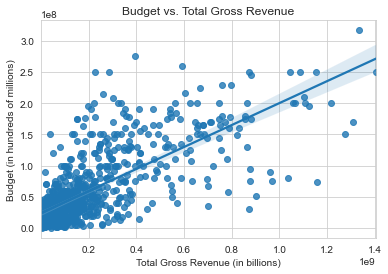

In [90]:
sns.regplot(x=movie_titles_budget['total_gross'], y=movie_titles_budget['budget'])
plt.title('Budget vs. Total Gross Revenue')
plt.xlabel('Total Gross Revenue (in billions)')
plt.ylabel('Budget (in hundreds of millions)')